# Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’


## Objective :
As a business manager, try to find out the weak areas where you can work to make more profit.


What all business problems you can derive by exploring the data? 

# Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Data 

In [29]:
cd D:\Data scientist file\Data sets

D:\Data scientist file\Data sets


In [30]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()    # shows first 5 rows of dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Data Information 

In [31]:
df.shape

(9994, 13)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


total 13 columns, with 8 columns are object type, 2 columns are integer, 3 columns are float type.

In [33]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Cleaning the data 

In [34]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

#### The data is for United states only.so we can drop Country column as we don't need any analysis to be done based on it .

In [35]:
# Dropping country column
df=df.drop("Country",axis=1)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Now let's analyse data by category wise

In [36]:
df["Category"].nunique()

3

#### There are three categories : Furniture,Office Supplies,Technology


In [37]:
# Number of products in each category
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [38]:
# Number of sub category
df["Sub-Category"].nunique()

17

In [39]:
#Number of products in each Sub Category
df["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

## Now let's see how sub categories are distributed with respect to category

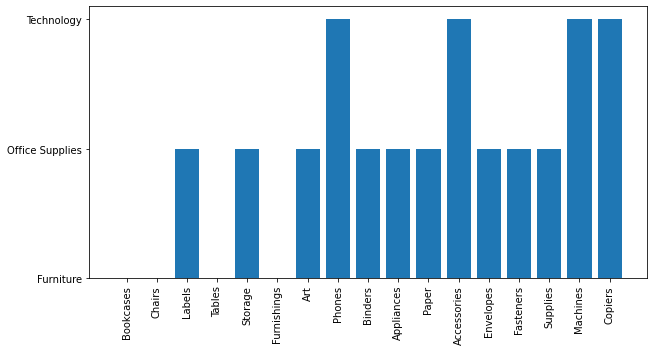

In [40]:
plt.figure(figsize=(10,5))
plt.bar("Sub-Category","Category",data=df)
plt.xticks(rotation='vertical')
plt.show()

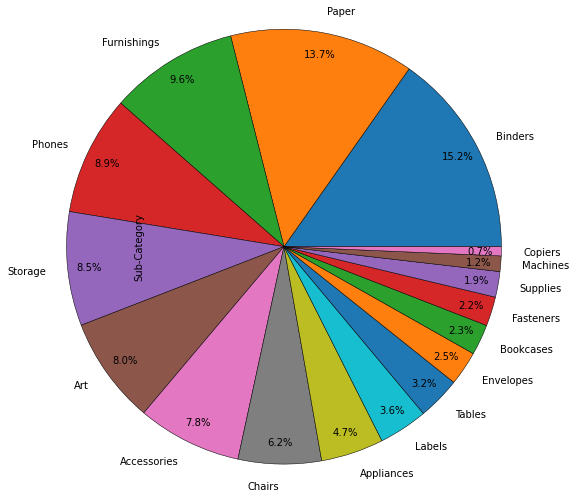

In [41]:
plt.figure(figsize=(10,5))
df["Sub-Category"].value_counts().plot.pie(autopct="%1.1f%%",radius=2,pctdistance=0.9,wedgeprops={"edgecolor":"0","linewidth":0.5,"linestyle":"solid"})
plt.show()


you can see the store has wide variety of office supplies especially in Binders and Paper 

<ipython-input-42-9645e61596f8>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Sub-Category")['Sales','Profit'].agg([sum]).plot.bar()


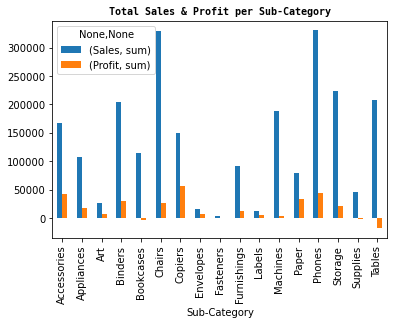

In [42]:
### Now will see sale and profit of sub category items.

df.groupby("Sub-Category")['Sales','Profit'].agg([sum]).plot.bar()
plt.title("Total Sales & Profit per Sub-Category",fontweight="bold",fontfamily="monospace",size=10)
plt.show()

1. Highest profit earned in Copiers.

2. Chairs and phones selling price is very high compared to other products

3. Bookcases and Tables in loss. 

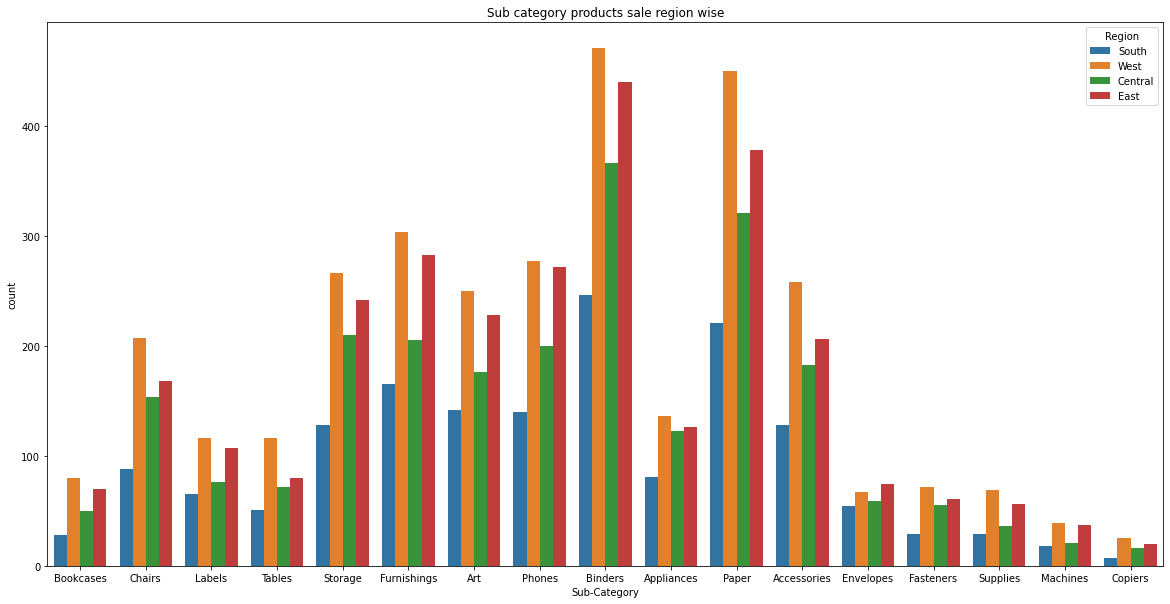

In [43]:
# Count of sub category Region wise
plt.figure(figsize=(20,10))
sns.countplot(x='Sub-Category',hue="Region",data=df)
plt.title("Sub category products sale region wise")
plt.show()

#### Region from WEST tend to order more from superstores compared to other three region.

let's see percentage of profit on sales 

In [45]:
df["cost"]=df["Sales"]-df["Profit"]
df["cost"].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: cost, dtype: float64

In [46]:
df["Profit%"]=(df["Profit"]/df["cost"])*100

In [49]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,cost,Profit%
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,19.047619
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,42.857143
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,88.679245
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,12.676056


Now its clearly shows the product cost and profit margin on each product.

In [57]:
# Profit percentage of first 5 sub-categories
df.iloc[[0,1,2,3,4],[7,13]]

,Sub-Category,Profit%
0,Bookcases,19.047619
1,Chairs,42.857143
2,Labels,88.679245
3,Tables,-28.571429
4,Storage,12.676056


In [63]:
# Categories of high profit percentage
df.sort_values(["Profit%","Sub-Category"],ascending=False).groupby("Profit%").head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,cost,Profit%
1696,Second Class,Home Office,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,New York City,New York,10035,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


#### 1. The Technology products like Machines, Phones,copiers have got 100% profit margin.

#### 2. Office supplies like papers, Binders have got 100% profit margin.

## 


In [65]:
df["Ship Mode"].nunique()

4

In [66]:
df["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [67]:
df["Segment"].nunique()

3

In [68]:
df["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<ipython-input-87-0c28ed5187e4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Segment")["Sales","Profit%"].agg(['sum']).plot.bar()


<AxesSubplot:xlabel='Segment'>

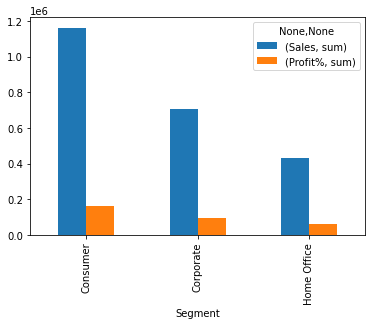

In [87]:
df.groupby("Segment")["Sales","Profit%"].agg(['sum']).plot.bar()

#### The Sales and profit margin is more in consumer segment compared to other segments.

# 

<ipython-input-90-69e40941112b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Ship Mode")["Sales","Profit%"].agg(['sum']).plot.bar()


<AxesSubplot:xlabel='Ship Mode'>

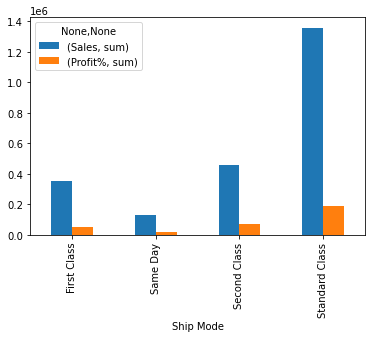

In [90]:
df.groupby("Ship Mode")["Sales","Profit%"].agg(['sum']).plot.bar()

#### There is a profit margin in standard class delivery.

# 

C:\Users\Windows 7\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


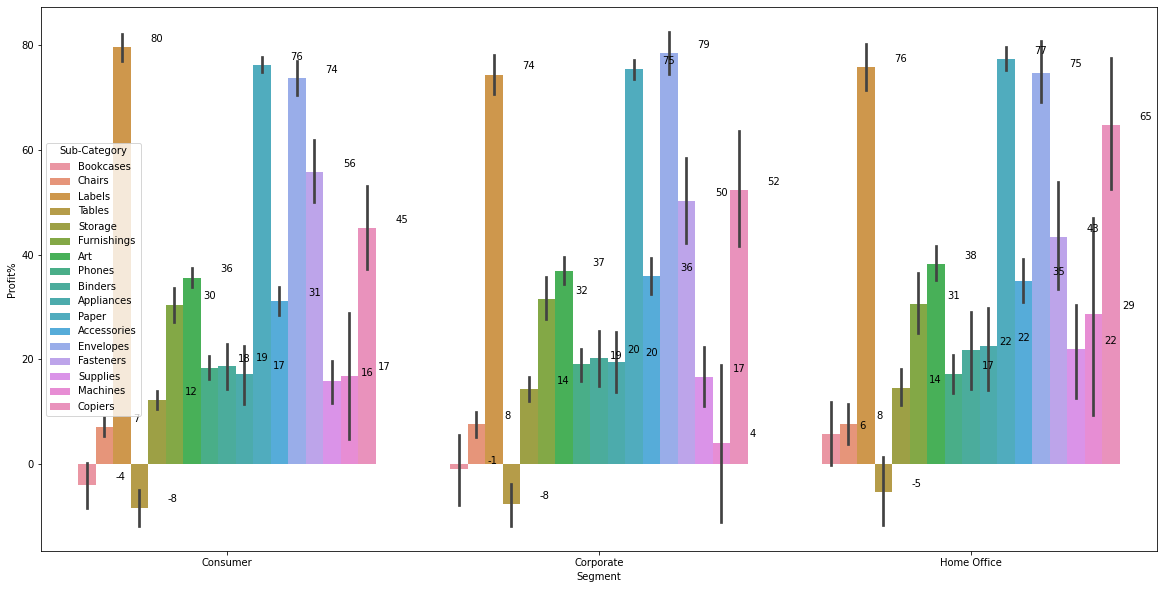

In [78]:
# calculating Profit gained in each category by segment wise
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
sns.barplot("Segment","Profit%",hue="Sub-Category",data=df)
for s in ax.patches :
    ax.annotate('{:.0f}'.format(s.get_height()),(s.get_x()+0.1,s.get_height()+1))
plt.show()